In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path=r'C:\Users\STACBD\bangla-money\Training\1\1_0.jpg'

In [3]:
a = plt.imread(image_path)
a = np.array(a)
a.shape

(120, 250, 3)

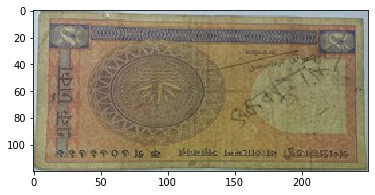

In [15]:
plt.imshow(a,cmap='gray')
plt.show()

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.144])

In [5]:
X = rgb2gray(a)
X.shape

(120, 250)

In [6]:
class Conv_op:
    # A Convolution layer using 3x3 filters.

    def __init__(self, num_filters, filter_size):
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.conv_filter = np.random.randn(num_filters, 3, 3) / 9

    def image_region(self, image):
        h, w = image.shape

        for i in range(h - self.filter_size + 1):
            for j in range(w - self.filter_size + 1):
                im_patch = image[i : (i + self.filter_size), j : (j + self.filter_size)]
                yield im_patch, i, j

    def forward(self, image):
        h, w = image.shape
        output = np.zeros(
            (h - self.filter_size + 1, w - self.filter_size + 1, self.num_filters)
        )

        for im_patch, i, j in self.image_region(image):
            output[i, j] = np.sum(im_patch * self.num_filters, axis=(0, 1))

        return output

In [7]:
conn = Conv_op(8, 3)
out = conn.forward(X)
out.shape

(118, 248, 8)

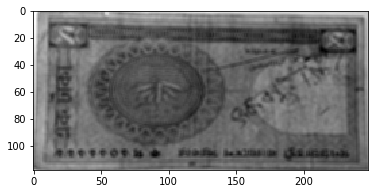

In [8]:
plt.imshow(out[:, :,7],cmap='gray')
plt.show()

In [9]:
class Max_pool:
    def __init__(self, filter_size):
        self.filter_size = filter_size

    def image_region(self, image):
        new_height = image.shape[0] // self.filter_size
        new_width = image.shape[1] // self.filter_size
        self.image = image

        for i in range(new_height):
            for j in range(new_width):
                image_patch = image[
                    (i * self.filter_size) : (i * self.filter_size + self.filter_size),
                    (j * self.filter_size) : (j * self.filter_size + self.filter_size),
                ]
                yield image_patch, i, j

    def forward(self, image):
        h, w, num_filter = image.shape
        output = np.zeros((h // self.filter_size, w // self.filter_size, num_filter))

        for image_patch, i, j in self.image_region(image):
            output[i, j] = np.amax(image_patch, axis=(0, 1))

        return output

In [10]:
conn2 = Max_pool(2)
out2 = conn2.forward(out)
out2.shape

(59, 124, 8)

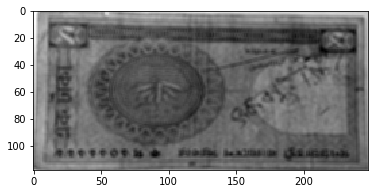

In [11]:
plt.imshow(out[:, :,7],cmap='gray')
plt.show()

In [12]:
class Softmax:
    # A standard fully-connected layer with softmax activation.

    def __init__(self, input_len, nodes):
        # We divide by input_len to reduce the variance of our initial values
        self.weights = np.random.randn(input_len, nodes) / input_len
        self.biases = np.zeros(nodes)
        print(len(self.weights))

    def forward(self, input):
        """
    Performs a forward pass of the softmax layer using the given input.
    Returns a 1d numpy array containing the respective probability values.
    - input can be any array with any dimensions.
    """
        input = input.flatten()
        print(len(input))

        input_len, nodes = self.weights.shape

        totals = np.dot(input, self.weights) + self.biases
        exp = np.exp(totals)
        return exp / np.sum(exp, axis=0)

In [14]:
conn3 = Softmax(59* 124* 8, 9)
out3 = conn3.forward(out2)
print(out3)

58528
58528
[1.00000000e+00 5.73356272e-50 2.45581995e-15 8.05340702e-49
 4.91055896e-41 5.65824283e-57 2.62778624e-25 5.01068685e-35
 7.76021416e-19]
